In [153]:
#https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6
# Imports
import numpy as np 
from sklearn.metrics import log_loss

      
# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)


hidden_size = 4
# Define useful functions    |

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.hidden_size = 4
        self.weights1= np.random.rand(self.input.shape[1],self.hidden_size) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(hidden_size,1)
        self.y = y
        self.output = np. zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1))
    
        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        

NN = NeuralNetwork(X,y)
for i in range(100): # trains the NN 1,000 times
    if i % 10 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(log_loss(y , NN.feedforward()))) # mean sum squared loss
        print ("\n")
  
    NN.train(X, y)

for iteration # 0

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.80150179]
 [0.84719528]
 [0.83423649]
 [0.86956068]]
Loss: 
1.0002211969085932


for iteration # 10

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.50436463]
 [0.50622258]
 [0.49900261]
 [0.50189767]]
Loss: 
0.6936968192340516


for iteration # 20

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.50267651]
 [0.50541923]
 [0.49968847]
 [0.50285038]]
Loss: 
0.6933790751688153


for iteration # 30

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.50119976]
 [0.50478914]
 [0.5003532 ]
 [0.50383254]]
Loss: 
0.6931117215174467


for iteration # 40

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1

In [154]:
NN = NeuralNetwork(X,y)

In [155]:
NN.weights1.shape


(3, 4)

In [156]:
import random
def create_pop_nns(population_size):
    pop = []
    scores = []
    weights_pop = []
    for i in range(population_size):
        NN = NeuralNetwork(X,y)
        pop.append(NN)
        weights_pop.append(np.hstack((NN.weights1.flatten(),NN.weights2.flatten())))
        scores.append(log_loss(y , NN.feedforward()))
        
    return pop, scores, weights_pop

def breed_by_crossover(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1,chromosome_length-1)
    
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    # Return children
    return child_1, child_2

In [157]:
classical_output= []

from numpy.random import randn
population_size =100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
mu = int(50)
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
for test in range(10):
    best_score =100
    classical_run = []
    population, scores, weights_pop = create_pop_nns(population_size)
    
    for i in range(generations):
        #select
        print(i)
        scores_sorted = np.argsort(scores)
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]

        parent_pool = []
        for i in range(mu):
            parent_pool.append(weights_pop[scores_sorted[i]])
        best_score = np.min(scores)
        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            NN = NeuralNetwork(X,y)
            ind = NN.input.shape[1]* NN.hidden_size
            NN.weights1= i[:ind].reshape(NN.input.shape[1], NN.hidden_size)
            NN.weights2 =i[ind:].reshape(NN.hidden_size,1)
            new_population.append(NN)
            new_scores.append(log_loss(y , NN.feedforward()))

        best_score_candidate = np.min(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmin(new_scores)]

        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        classical_run.append(best_score)

        print(best_score)
    classical_output.append(classical_run)
    
    
    
    

0
0.6965710704144248
1
0.6899714741669836
2
0.6899714741669836
3
0.6741126837719361
4
0.6591225357273791
5
0.6802902126295335
6
0.6802902126295335
7
0.6578757288662326
8
0.682800010287938
9
0.682800010287938
10
0.6489745842537605
11
0.6432436713449925
12
0.645920045915541
13
0.645920045915541
14
0.64478701632208
15
0.6525601088847877
16
0.6525601088847877
17
0.6433993395632727
18
0.6161816197106433
19
0.6196637370839022
20
0.6196637370839022
21
0.5928971344832389
22
0.5881995579054756
23
0.6264172598645993
24
0.6264172598645993
25
0.5783598206046714
26
0.5707088170898036
27
0.6059520159603166
28
0.6059520159603166
29
0.5925771992635585
30
0.5534009835093441
31
0.5947137723796011
32
0.5990187571281391
33
0.5990187571281391
34
0.5528875058690754
35
0.5431828364434325
36
0.5341190806351421
37
0.5327783055372284
38
0.5118188232591457
39
0.502118543968647
40
0.46090536906299917
41
0.4501342405473936
42
0.4220149207227619
43
0.4220149207227619
44
0.3342115903887719
45
0.3342115903887719
46
0

0.19825810121459644
69
0.19034005889836897
70
0.18555919310306268
71
0.18511821423338135
72
0.18377865123879672
73
0.18245243907374514
74
0.18012671344834436
75
0.17829788521885123
76
0.17717741425539069
77
0.17660915590086346
78
0.176434236729742
79
0.1760677181346126
80
0.17593090463547495
81
0.17593090463547495
82
0.17471942393445544
83
0.17471942393445544
84
0.1739220436366727
85
0.17389734921498373
86
0.17389734921498373
87
0.1738125834907314
88
0.1738125834907314
89
0.17375782014854452
90
0.17375782014854452
91
0.17354772400859325
92
0.1734437017784708
93
0.17341113916848916
94
0.17339840487902256
95
0.17332404967364035
96
0.1729342995232072
97
0.17306684704661407
98
0.1730739009506566
99
0.17311760288332778
0
0.7205884181194422
1
0.6915383489060797
2
0.6915383489060797
3
0.6889736895813208
4
0.6704243488995847
5
0.6704243488995847
6
0.6647176595961326
7
0.6610465884314483
8
0.6456850072738105
9
0.6722570476119526
10
0.6722570476119526
11
0.6614589910583263
12
0.6462152045531617


0.49710403428505734
34
0.49710403428505734
35
0.45249306070886913
36
0.44826432025237384
37
0.304833129449008
38
0.3103481727711736
39
0.3466413975743491
40
0.3466413975743491
41
0.3365532304366944
42
0.3365532304366944
43
0.3201805962545995
44
0.2953375783657781
45
0.31650686956408514
46
0.31650686956408514
47
0.2212944730269082
48
0.2463011006363687
49
0.2463011006363687
50
0.23894591994164477
51
0.23894591994164477
52
0.22221777363748124
53
0.20527991319838915
54
0.19665879793232993
55
0.1837791025731334
56
0.1769556816980088
57
0.1769556816980088
58
0.1526938815411592
59
0.12121645354301677
60
0.11898957651280544
61
0.11898957651280544
62
0.04813394037665206
63
0.04813394037665206
64
0.04021294427110026
65
0.045773006914834324
66
0.045773006914834324
67
0.033464641695382095
68
0.033464641695382095
69
0.017410816705440924
70
0.02639924770008195
71
0.02639924770008195
72
0.016039292599017776
73
0.013004668467300739
74
0.01287223531697555
75
0.008172727609419941
76
0.00784462327509059

In [158]:
classical_output_p= []

from numpy.random import randn
population_size =100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
mu = int(50)
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
for test in range(10):
    best_score =100
    classical_run = []
    population, scores, weights_pop = create_pop_nns(population_size)
    best_weights = weights_pop[np.argmin(scores)]
    
    for i in range(generations):
        #select
        print(i)
        scores_sorted = np.argsort(scores)
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]

        parent_pool = []
        for i in range(mu):
            parent_pool.append(weights_pop[scores_sorted[i]])
        best_score = np.min(scores)
        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                #parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            NN = NeuralNetwork(X,y)
            ind = NN.input.shape[1]* NN.hidden_size
            NN.weights1= i[:ind].reshape(NN.input.shape[1], NN.hidden_size)
            NN.weights2 =i[ind:].reshape(NN.hidden_size,1)
            new_population.append(NN)
            new_scores.append(log_loss(y , NN.feedforward()))

        best_score_candidate = np.min(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmax(new_scores)]
            best_weights = new_weights_pop[np.argmin(new_scores)]

        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        classical_run.append(best_score)

        print(best_score)
    classical_output_p.append(classical_run)
    
    
    
    

0
0.7066121615135176
1
0.6895594524441895
2
0.6895594524441895
3
0.6722418994988864
4
0.6687178940284992
5
0.6630280030236912
6
0.6726191124375491
7
0.6726191124375491
8
0.6558831448991176
9
0.6595480251574585
10
0.6595480251574585
11
0.6581364390046216
12
0.6149593354894588
13
0.6230795890375468
14
0.6230795890375468
15
0.5642473343372162
16
0.5492145879665783
17
0.5492145879665783
18
0.5077466752701175
19
0.5068461623433267
20
0.5068461623433267
21
0.45374833243017254
22
0.45374833243017254
23
0.4235674030297862
24
0.4235674030297862
25
0.38560318327739157
26
0.38560318327739157
27
0.3628717059006289
28
0.33119207004573575
29
0.33119207004573575
30
0.2743718720701728
31
0.2705126223632313
32
0.2705126223632313
33
0.22416086504931776
34
0.2162603822221535
35
0.21120906659856525
36
0.21120906659856525
37
0.15853245726918644
38
0.1559698009041826
39
0.1559698009041826
40
0.12352548128463432
41
0.0944946231571474
42
0.0944946231571474
43
0.08460342238795682
44
0.08460342238795682
45
0.07

0.0021307488574874803
62
0.0021307488574874803
63
0.0014710731754124862
64
0.0014710731754124862
65
0.0012471596234303814
66
0.0010831643254518451
67
0.0010661899381856112
68
0.0010923366355184967
69
0.0010923366355184967
70
0.0008653794581526599
71
0.0008852573051404049
72
0.0008852573051404049
73
0.0005052918413632541
74
0.0005052918413632541
75
0.0003589724440237394
76
0.0003551414143376431
77
0.0003551414143376431
78
0.00026262254392531696
79
0.00022514492599408595
80
0.00022514492599408595
81
0.00016594773794867905
82
0.0001537469119118717
83
0.00015123320903538532
84
9.366628066049928e-05
85
0.00014242591259281645
86
0.00014242591259281645
87
0.00011761723296674519
88
0.00011761723296674519
89
8.954738243494996e-05
90
8.954738243494996e-05
91
4.8413226487166585e-05
92
4.255131566505955e-05
93
4.255131566505955e-05
94
2.1885341374953534e-05
95
2.1885341374953534e-05
96
1.625074726525981e-05
97
1.625074726525981e-05
98
1.1211426545034456e-05
99
1.1211426545034456e-05
0
0.7097828905

0.4957917298626191
20
0.4957917298626191
21
0.44814493673249745
22
0.4334052612188213
23
0.4334052612188213
24
0.3866238323607159
25
0.3707604069713556
26
0.3611032135943756
27
0.3758361518249354
28
0.3758361518249354
29
0.29884786826875187
30
0.29884786826875187
31
0.2553168152095704
32
0.2553168152095704
33
0.20600619412503712
34
0.17935511180792188
35
0.17935511180792188
36
0.15981103220721482
37
0.18046399456264392
38
0.18046399456264392
39
0.15098053583322382
40
0.1476852488500754
41
0.1476852488500754
42
0.12876057415368883
43
0.12392262718535096
44
0.12392262718535096
45
0.11050202282550187
46
0.11050202282550187
47
0.09484504282122863
48
0.0961986593558405
49
0.0961986593558405
50
0.07040070491280907
51
0.06387407079579788
52
0.06276661769583694
53
0.05810109956011425
54
0.05810109956011425
55
0.048902707970421774
56
0.048379020541785514
57
0.04276366665678711
58
0.04276366665678711
59
0.03525052174690639
60
0.03525052174690639
61
0.0223012016080236
62
0.0223012016080236
63
0.0

In [159]:
import dimod
def create_qubo(population, scores, k, negate_scores):
    # Get population size
    population_size = len(population)
    pop_index = list(range(population_size))
    #print(pop_index)
    #alpha =100
    
    beta = 100
    alpha = 1000
    #beta = 1
    bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)
    #scores = scores/max(scores)
    for idx, i in enumerate(scores):
        bqm.add_variable(idx, (i *alpha))
        #print("linear: ", i)
        
    for p0, p1 in itertools.combinations(pop_index, 2):
        dist = -np.abs(np.linalg.norm(population[p0]-  population[p1]))
        #print("quadratic: ", dist)
        bqm.add_interaction(p0, p1, (dist*beta)) 
   # print(list(bqm.linear.values()))
    #print(list(bqm.linear.values())/min(list(bqm.linear.values())))
    #bqm.linear = list(bqm.linear.values())/max(list(bqm.linear.values()))
    #bqm.quadratic = list(bqm.quadratic.values())/max(list(bqm.quadratic.values()))
    
    bqm.update(dimod.generators.combinations(pop_index, k, strength=10000))
    
    return bqm

def create_qubo_rl(population, scores, k, negate_scores):
    # Get population size
    population_size = len(population)
    pop_index = list(range(population_size))
    #print(pop_index)
    #alpha =100
    
    beta = 100
    alpha = 100
    #beta = 1
    bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)
    #scores = scores/max(scores)
    for idx, i in enumerate(scores):
        bqm.add_variable(idx, (-i *alpha))
        #print("linear: ", i)
        
    for p0, p1 in itertools.combinations(pop_index, 2):
        dist = -np.linalg.norm(population[p0]-  population[p1])
        #print("quadratic: ", dist)
        bqm.add_interaction(p0, p1, (dist*beta)) 
   # print(list(bqm.linear.values()))
    #print(list(bqm.linear.values())/min(list(bqm.linear.values())))
    #bqm.linear = list(bqm.linear.values())/max(list(bqm.linear.values()))
    #bqm.quadratic = list(bqm.quadratic.values())/max(list(bqm.quadratic.values()))
    
    bqm.update(dimod.generators.combinations(pop_index, k, strength=10000))
    
    return bqm

def select_individuals(sampler,bqm, population, scores, k):
    
    scores=np.array(scores)
    sample_ = sampler.sample(bqm)
    #print(sample_)
    sample_= sample_.first
    sample_energy = sample_.energy
    sample = sample_.sample
    
    
    parents = np.where(sample==1)
    #print(parents)
    
    parent_idx = []
    pop_out = []
    scores_out = []
    for idx, i in enumerate(population):
        #selected_features[k-1, fi] = sample[f]
        #print(f, fi)
        if sample[idx] == 1.0:
            #parent_idx.append(idx)
            #pop_out.append(population[idx])
            #scores_out.append(scores[idx])
            parent_idx.append(idx)
    for i in parent_idx[:k]:
        pop_out.append(population[i])
        scores_out.append(scores[i])
        
    #print(population[parent_idx])
    #return population[parent_idx], scores[parent_idx], sample_energy, sample
    print(len(pop_out))
    return pop_out, scores_out
    

In [160]:
from numpy.random import randn
import dimod
import neal
import itertools

quantum_output = []

population_size =100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
mu = int(50)
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
#best_score = np.min(scores)

for test in range(10):
    best_score =100
    quantum_run = []
    population, scores, weights_pop = create_pop_nns(population_size)
    for i in range(generations):
        print(i)
        #select classically
        #scores_sorted = np.argsort(scores)
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]

        #parent_pool = []
        #for i in range(mu):
            #parent_pool.append(weights_pop[scores_sorted[i]])
        #select quantumly  
        sampler = neal.SimulatedAnnealingSampler()
        bqm = create_qubo(weights_pop, scores, mu, negate_scores=False)
        parent_pool, scores_pool, = select_individuals(sampler, bqm, weights_pop, scores, mu)

        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0., high=0.9)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            NN = NeuralNetwork(X,y)
            ind = NN.input.shape[1]* NN.hidden_size
            NN.weights1= i[:ind].reshape(NN.input.shape[1], NN.hidden_size)
            NN.weights2 =i[ind:].reshape(NN.hidden_size,1)
            new_population.append(NN)
            new_scores.append(log_loss(y , NN.feedforward()))

        best_score_candidate = np.min(new_scores)
        if best_score_candidate < best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmin(new_scores)]

        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        print(best_score)
        quantum_run.append(best_score)
    quantum_output.append(quantum_run)
        
    
    
    #crossover
    #mutate
    
    
    

0
50
0.6958016834110579
1
50
0.6826033524859492
2
50
0.671994099472545
3
50
0.6676512928365942
4
50
0.6676512928365942
5
50
0.6325536514230783
6
50
0.6325536514230783
7
50
0.6325536514230783
8
50
0.6325536514230783
9
50
0.6325536514230783
10
50
0.5523878331270149
11
50
0.51362378889431
12
50
0.51362378889431
13
50
0.51362378889431
14
50
0.4589517411622449
15
50
0.4589517411622449
16
50
0.4589517411622449
17
50
0.4589517411622449
18
50
0.4589517411622449
19
50
0.3161923867961137
20
50
0.2879814655006623
21
50
0.2857848289860405
22
50
0.27547888994994324
23
50
0.27547888994994324
24
50
0.27547888994994324
25
50
0.27547888994994324
26
50
0.27547888994994324
27
50
0.27547888994994324
28
50
0.27547888994994324
29
50
0.27547888994994324
30
50
0.26086765821671615
31
50
0.26086765821671615
32
50
0.12895614200566102
33
50
0.12895614200566102
34
50
0.12895614200566102
35
50
0.12895614200566102
36
50
0.12895614200566102
37
50
0.12895614200566102
38
50
0.08853814506789723
39
50
0.02922993764658081

50
0.33658598451120497
23
50
0.33658598451120497
24
50
0.33658598451120497
25
50
0.33658598451120497
26
50
0.33658598451120497
27
50
0.33658598451120497
28
50
0.33658598451120497
29
50
0.33658598451120497
30
50
0.33658598451120497
31
50
0.33658598451120497
32
50
0.33658598451120497
33
50
0.1732045521430766
34
50
0.1732045521430766
35
50
0.12808710319198113
36
50
0.06460129081554226
37
50
0.05192095318727064
38
50
0.05192095318727064
39
50
0.04341831350483818
40
50
0.04341831350483818
41
50
0.04341831350483818
42
50
0.04341831350483818
43
50
0.012371340840981584
44
50
0.012371340840981584
45
50
0.012371340840981584
46
50
0.012371340840981584
47
50
0.012371340840981584
48
50
0.012371340840981584
49
50
0.012371340840981584
50
50
0.012371340840981584
51
50
0.012371340840981584
52
50
0.012371340840981584
53
50
0.012371340840981584
54
50
0.012371340840981584
55
50
0.012371340840981584
56
50
0.012371340840981584
57
50
0.012371340840981584
58
50
0.012371340840981584
59
50
0.012371340840981584


0.07927731672355799
33
50
0.07927731672355799
34
50
0.07927731672355799
35
50
0.07927731672355799
36
50
0.07927731672355799
37
50
0.07927731672355799
38
50
0.07927731672355799
39
50
0.07927731672355799
40
50
0.07927731672355799
41
50
0.07927731672355799
42
50
0.07927731672355799
43
50
0.07927731672355799
44
50
0.07927731672355799
45
50
0.07927731672355799
46
50
0.07927731672355799
47
50
0.07927731672355799
48
50
0.07927731672355799
49
50
0.07927731672355799
50
50
0.07927731672355799
51
50
0.07927731672355799
52
50
0.07927731672355799
53
50
0.07927731672355799
54
50
0.045560554289779294
55
50
0.045560554289779294
56
50
0.045560554289779294
57
50
0.045560554289779294
58
50
0.045560554289779294
59
50
0.045560554289779294
60
50
0.045560554289779294
61
50
0.045560554289779294
62
50
0.045560554289779294
63
50
0.045560554289779294
64
50
0.045560554289779294
65
50
0.045560554289779294
66
50
0.045560554289779294
67
50
0.045560554289779294
68
50
0.045560554289779294
69
50
0.045560554289779294
70

50
0.10436788233808089
46
50
0.10436788233808089
47
50
0.10436788233808089
48
50
0.10436788233808089
49
50
0.10436788233808089
50
50
0.10436788233808089
51
50
0.10436788233808089
52
50
0.10436788233808089
53
50
0.10436788233808089
54
50
0.10436788233808089
55
50
0.10436788233808089
56
50
0.10436788233808089
57
50
0.10436788233808089
58
50
0.10436788233808089
59
50
0.10436788233808089
60
50
0.10436788233808089
61
50
0.10436788233808089
62
50
0.10436788233808089
63
50
0.10436788233808089
64
50
0.10436788233808089
65
50
0.10436788233808089
66
50
0.033507858274764546
67
50
0.033507858274764546
68
50
0.033507858274764546
69
50
0.033507858274764546
70
50
0.033507858274764546
71
50
0.033507858274764546
72
50
0.033507858274764546
73
50
0.033507858274764546
74
50
0.033507858274764546
75
50
0.033507858274764546
76
50
0.033507858274764546
77
50
0.033507858274764546
78
50
0.033507858274764546
79
50
0.033507858274764546
80
50
0.033507858274764546
81
50
0.033507858274764546
82
50
0.03350785827476454

In [161]:
from numpy.random import randn
import dimod
import neal
import itertools

quantum_output_p = []

population_size =100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
mu = int(50)
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
#best_score = np.min(scores)

for test in range(10):
    best_score =100
    quantum_run = []
    population, scores, weights_pop = create_pop_nns(population_size)
    best_weights = weights_pop[np.argmin(scores)]
    for i in range(generations):
        print(i)
        #select classically
        #scores_sorted = np.argsort(scores)
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]

        #parent_pool = []
        #for i in range(mu):
            #parent_pool.append(weights_pop[scores_sorted[i]])
        #select quantumly  
        sampler = neal.SimulatedAnnealingSampler()
        bqm = create_qubo(weights_pop, scores, mu, negate_scores=False)
        parent_pool, scores_pool, = select_individuals(sampler, bqm, weights_pop, scores, mu)

        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                #parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0., high=0.9)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            NN = NeuralNetwork(X,y)
            ind = NN.input.shape[1]* NN.hidden_size
            NN.weights1= i[:ind].reshape(NN.input.shape[1], NN.hidden_size)
            NN.weights2 =i[ind:].reshape(NN.hidden_size,1)
            new_population.append(NN)
            new_scores.append(log_loss(y , NN.feedforward()))

        best_score_candidate = np.min(new_scores)
        if best_score_candidate < best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmin(new_scores)]
            best_weights = new_weights_pop[np.argmin(new_scores)]

        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        print(best_score)
        quantum_run.append(best_score)
    quantum_output_p.append(quantum_run)
        
    
    
    #crossover
    #mutate
    
    
    
    

0
50
0.6886531963425275
1
50
0.6747656874574992
2
50
0.6175787264558936
3
50
0.5685088546119283
4
50
0.5302541573681452
5
50
0.5139850542199542
6
50
0.47964176662152097
7
50
0.454966753295022
8
50
0.4469814524525966
9
50
0.3975657606532695
10
50
0.3584595369997723
11
50
0.33473174387661075
12
50
0.33082957489842946
13
50
0.31013231959317805
14
50
0.30163953015342404
15
50
0.2995873951413814
16
50
0.2977144806079024
17
50
0.28441435690475025
18
50
0.2690141748124143
19
50
0.242780305490015
20
50
0.2101677107607038
21
50
0.2101677107607038
22
50
0.2101677107607038
23
50
0.19750297835210048
24
50
0.19211030200482684
25
50
0.1432631319168323
26
50
0.1130685202504244
27
50
0.0664412087594524
28
50
0.04011425793611539
29
50
0.030442503023936772
30
50
0.030442503023936772
31
50
0.028218135284225773
32
50
0.028218135284225773
33
50
0.022365903037987127
34
50
0.022365903037987127
35
50
0.019267762154389356
36
50
0.01872703322662999
37
50
0.01300937069448436
38
50
0.01300937069448436
39
50
0.013

0.20396677211699765
25
50
0.20396677211699765
26
50
0.20396677211699765
27
50
0.20396677211699765
28
50
0.20396677211699765
29
50
0.20396677211699765
30
50
0.20396677211699765
31
50
0.20396677211699765
32
50
0.18962428253018715
33
50
0.18962428253018715
34
50
0.1283148306291542
35
50
0.1283148306291542
36
50
0.1283148306291542
37
50
0.1283148306291542
38
50
0.1283148306291542
39
50
0.1283148306291542
40
50
0.1283148306291542
41
50
0.1283148306291542
42
50
0.1283148306291542
43
50
0.1283148306291542
44
50
0.1283148306291542
45
50
0.1283148306291542
46
50
0.1283148306291542
47
50
0.1283148306291542
48
50
0.1283148306291542
49
50
0.1283148306291542
50
50
0.1283148306291542
51
50
0.1283148306291542
52
50
0.1283148306291542
53
50
0.1283148306291542
54
50
0.1283148306291542
55
50
0.1283148306291542
56
50
0.1283148306291542
57
50
0.1283148306291542
58
50
0.1283148306291542
59
50
0.1283148306291542
60
50
0.1283148306291542
61
50
0.1283148306291542
62
50
0.1283148306291542
63
50
0.1283148306291

50
0.016326309901641117
42
50
0.015470622816221212
43
50
0.015336825676216474
44
50
0.012608877687571934
45
50
0.0115109449829591
46
50
0.010186335463209005
47
50
0.010186335463209005
48
50
0.010186335463209005
49
50
0.009731553565325235
50
50
0.006651615573607566
51
50
0.006651615573607566
52
50
0.004427462989750749
53
50
0.004427462989750749
54
50
0.004427462989750749
55
50
0.004427462989750749
56
50
0.004427462989750749
57
50
0.004285785821261512
58
50
0.004266144195853362
59
50
0.0036461705153766665
60
50
0.0022529274315777224
61
50
0.002034252196285606
62
50
0.0017488198639810306
63
50
0.0015422072961747031
64
50
0.0015229629082044978
65
50
0.0009963881066497782
66
50
0.0008576383287510481
67
50
0.0008188140089936367
68
50
0.0006273302218804491
69
50
0.000467593410510533
70
50
0.00042126527576040766
71
50
0.00023828063358631596
72
50
0.00023794831095026552
73
50
0.00017470351852953822
74
50
0.00011526126733387421
75
50
0.0001042530593202906
76
50
8.093923233694529e-05
77
50
5.4612

50
0.01593904057910979
54
50
0.01593904057910979
55
50
0.01593904057910979
56
50
0.01593904057910979
57
50
0.01593904057910979
58
50
0.01593904057910979
59
50
0.01593904057910979
60
50
0.01593904057910979
61
50
0.01593904057910979
62
50
0.01593904057910979
63
50
0.01593904057910979
64
50
0.01593904057910979
65
50
0.01593904057910979
66
50
0.01593904057910979
67
50
0.01593904057910979
68
50
0.01593904057910979
69
50
0.01593904057910979
70
50
0.01593904057910979
71
50
0.01593904057910979
72
50
0.01593904057910979
73
50
0.01593904057910979
74
50
0.01593904057910979
75
50
0.01593904057910979
76
50
0.01593904057910979
77
50
0.01593904057910979
78
50
0.01593904057910979
79
50
0.01593904057910979
80
50
0.01593904057910979
81
50
0.01593904057910979
82
50
0.01593904057910979
83
50
0.01593904057910979
84
50
0.01593904057910979
85
50
0.01593904057910979
86
50
0.01593904057910979
87
50
0.01593904057910979
88
50
0.01593904057910979
89
50
0.01593904057910979
90
50
0.01593904057910979
91
50
0.0159390

In [162]:

classical_output = np.array(classical_output)
classical_output.mean(axis=0)

quantum_output = np.array(quantum_output)
quantum_output.mean(axis=0)

array([0.69162696, 0.67631445, 0.66842669, 0.64648159, 0.64231084,
       0.62047454, 0.61219977, 0.57981077, 0.57320127, 0.55727781,
       0.54468589, 0.51990644, 0.48422814, 0.45989867, 0.41722933,
       0.41704343, 0.39494667, 0.39216975, 0.35881257, 0.34453663,
       0.33728451, 0.31793561, 0.26862356, 0.26684875, 0.24757685,
       0.24437753, 0.23050715, 0.23050715, 0.22113951, 0.21677102,
       0.2153099 , 0.21014139, 0.18168434, 0.16196934, 0.15019141,
       0.1378447 , 0.12728233, 0.1260143 , 0.11390967, 0.10712858,
       0.10712858, 0.09484769, 0.08453743, 0.08143273, 0.08143273,
       0.08143273, 0.08143273, 0.07987215, 0.07987215, 0.07854175,
       0.07854175, 0.07854175, 0.07727558, 0.07727558, 0.06490892,
       0.06436136, 0.06436136, 0.06436136, 0.06436136, 0.06436136,
       0.06436136, 0.0639207 , 0.04757113, 0.04757113, 0.04461486,
       0.04461486, 0.03752886, 0.03752886, 0.03752886, 0.03752886,
       0.03752886, 0.03146998, 0.03146998, 0.03146998, 0.03146

In [164]:
import pandas as pd

import matplotlib.pyplot as plt

data_viz = pd.DataFrame()

data_viz['c_mean'] = classical_output.mean(axis=0)[:, :75]
data_viz['q_mean'] = quantum_output.mean(axis=0)[:, :75]

data_viz['c_std'] = classical_output.std(axis=0)[:, :75]
data_viz['q_std'] = quantum_output.std(axis=0)[:, :75]

x = np.arange(len(data_viz))
plt.plot(x, data_viz['q_mean'], 'b-', label='QA-ES Neuroevolution')
plt.fill_between(x, data_viz['q_mean'] -data_viz['q_std'], data_viz['q_mean']+ data_viz['q_std'], color='b', alpha=0.2)

plt.plot(x, data_viz['c_mean'], 'g-', label='ES Neuroevolution')
plt.fill_between(x, data_viz['c_mean'] - data_viz['c_std'], data_viz['c_mean'] + data_viz['c_std'], color='g', alpha=0.2)

plt.legend()
plt.title("Average Loss over Generations for XOR Learning: 10 trials")
#plt.title("Validation Accuracy curves for HPO Benchmark " +  str(e) + " 20 trials, 100 generations")
plt.xlabel("Generations")
plt.ylabel("Average Sum of Squared Loss")
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [135]:
np.array(classical_output_p).shape

(10, 100)

/Users/davidvondollen/opt/anaconda3/envs/phd-fundamentals-3.7/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/davidvondollen/opt/anaconda3/envs/phd-fundamentals-3.7/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


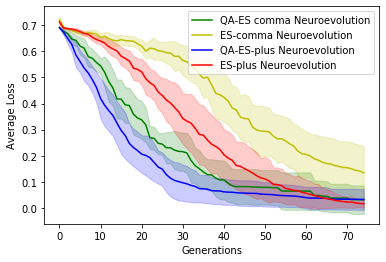

In [166]:
import pandas as pd

import matplotlib.pyplot as plt

data_viz = pd.DataFrame()

data_viz['c_mean'] = np.array(classical_output).mean(axis=0)[:75]
data_viz['q_mean'] = np.array(quantum_output).mean(axis=0)[:75]
data_viz['c_mean_p'] = np.array(classical_output_p).mean(axis=0)[:75]
data_viz['q_mean_p'] = np.array(quantum_output_p).mean(axis=0)[:75]

data_viz['c_std'] = np.array(classical_output).std(axis=0)[:75]
data_viz['q_std'] = np.array(quantum_output).std(axis=0)[:75]
data_viz['c_std_p'] = np.array(classical_output_p).std(axis=0)[:75]
data_viz['q_std_p'] = np.array(quantum_output_p).std(axis=0)[:75]

x = np.arange(len(data_viz))
plt.plot(x, data_viz['q_mean'], 'g-', label='QA-ES comma Neuroevolution')
plt.fill_between(x, data_viz['q_mean'] -data_viz['q_std'], data_viz['q_mean']+ data_viz['q_std'], color='g', alpha=0.2)

plt.plot(x, data_viz['c_mean'], 'y-', label='ES-comma Neuroevolution')
plt.fill_between(x, data_viz['c_mean'] - data_viz['c_std'], data_viz['c_mean'] + data_viz['c_std'], color='y', alpha=0.2)

plt.plot(x, data_viz['q_mean_p'], 'b-', label='QA-ES-plus Neuroevolution')
plt.fill_between(x, data_viz['q_mean_p'] -data_viz['q_std_p'], data_viz['q_mean_p']+ data_viz['q_std_p'], color='b', alpha=0.2)

plt.plot(x, data_viz['c_mean_p'], 'r-', label='ES-plus Neuroevolution')
plt.fill_between(x, data_viz['c_mean_p'] - data_viz['c_std_p'], data_viz['c_mean_p'] + data_viz['c_std_p'], color='r', alpha=0.2)

plt.legend()
#plt.title("Average Loss over Generations for XOR Learning: 10 trials")
#plt.title("Validation Accuracy curves for HPO Benchmark " +  str(e) + " 20 trials, 100 generations")
plt.xlabel("Generations")
plt.ylabel("Average Loss")
plt.show()

In [152]:
data_viz

,c_mean,q_mean,c_p_mean,q_p_mean,c_std,q_std,c_std_p,q_std_p
0,54.7,56.6,58.0,60.3,11.402193,8.475848,11.402193,8.475848
1,64.8,59.8,60.5,62.8,16.515447,7.277362,16.515447,7.277362
2,67.2,71.1,67.5,64.7,14.558846,10.241582,14.558846,10.241582
3,68.7,75.4,68.7,66.1,13.565029,12.916656,13.565029,12.916656
4,71.4,78.5,70.7,68.7,13.101145,15.793986,13.101145,15.793986
...,...,...,...,...,...,...,...,...
95,99.4,103.4,93.2,92.3,10.836974,6.606058,10.836974,6.606058
96,99.4,103.4,93.2,92.3,10.836974,6.606058,10.836974,6.606058
97,99.4,103.4,93.2,92.3,10.836974,6.606058,10.836974,6.606058
98,99.4,103.4,93.3,92.3,10.836974,6.606058,10.836974,6.606058


In [146]:
classical_output[:, -1]

array([0.0220568 , 0.06523334, 0.00230799, 0.00283493, 0.00100965,
       0.00060584, 0.0012558 , 0.00433676, 0.0026251 , 0.00073875])

In [141]:
print(ttest_ind( np.array(classical_output)[:, -1],np.array(quantum_output)[:, -1],alternative='less'))

Ttest_indResult(statistic=0.3193953398816876, pvalue=0.6234480905055464)


In [ ]:
np.array(quantum_output_p)[:, -1]

In [ ]:
np.array(classical_output_p)[:, -1]

In [ ]:
import scipy

from scipy.stats import ttest_ind

print(ttest_ind(np.array(quantum_output_p)[:, -1], np.array(classical_output_p)[:, -1],alternative='less'))

In [31]:
# try neuroevolution with openai gym

In [ ]:
import pickle
with open('./qe-es-p_xor_050423_10trials_100_generations_100alpha_beta.pkl', 'wb') as f:
    pickle.dump(quantum_output_p, f)
    
with open('./es-p_xor_050423_10trials_100_generations_100alpha_beta.pkl', 'wb') as f:
    pickle.dump(classical_output_p, f)
    
with open('./qe-es_xor_050423_10trials_100_generations_100alpha_beta.pkl', 'wb') as f:
    pickle.dump(quantum_output, f)
    
with open('./es_xor_050423_10trials_100_generations_100alpha_beta.pkl', 'wb') as f:
    pickle.dump(classical_output, f)

In [151]:
import pickle
with open('./qe-es-p_xor_050423_10trials_100_generations_100alpha_beta.pkl', 'rb') as f:
    quantum_output_p = pickle.load(f)
    
with open('./es-p_xor_050423_10trials_100_generations_100alpha_beta.pkl', 'rb') as f:
    classical_output_p = pickle.load(f)    
    
with open('./qe-es_xor_050423_10trials_100_generations_100alpha_beta.pkl', 'rb') as f:
    quantum_output = pickle.load(f)
    
with open('./es-p_xor_050423_10trials_100_generations_100alpha_beta.pkl', 'rb') as f:
    classical_output = pickle.load(f)
    


FileNotFoundError: [Errno 2] No such file or directory: './qe-es-p_xor_050423_10trials_100_generations_100alpha_beta.pkl'

In [220]:
import gym
def softmax(x):
    x = np.exp(x)/np.sum(np.exp(x))
    return x

def relu(x):
    return np.maximum(0,x)

class CartPoleNeuralNetwork:
    def __init__(self, x):
        try:
            self.input = x[0].reshape(1,x[0].shape[0])
            
        except:
            self.input = x.reshape(1,x.shape[0])
            
        self.hidden_size = 8
        self.weights1= np.random.uniform(-1,1, (self.input.shape[1],self.hidden_size)) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.uniform(-1, 1,(self.hidden_size,2))
       
        
    def feedforward(self):
        self.layer1 = relu(np.dot(self.input, self.weights1))
        self.layer2 = relu(np.dot(self.layer1, self.weights2))
        #print(self.layer2)
        
        return softmax(self.layer2)
    
    
class MountainCarNeuralNetwork:
    def __init__(self, x):
        try:
            self.input = x[0].reshape(1,x[0].shape[0])
            
        except:
            self.input = x.reshape(1,x.shape[0])
            
        self.hidden_size = 8
        self.weights1= np.random.uniform(-1,1, (self.input.shape[1],self.hidden_size)) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.uniform(-1, 1,(self.hidden_size,3))
       
        
    def feedforward(self):
        self.layer1 = relu(np.dot(self.input, self.weights1))
        self.layer2 = relu(np.dot(self.layer1, self.weights2))
        #print(self.layer2)
        
        return softmax(self.layer2)

In [210]:
env = gym.make('CartPole-v1')
obs = env.reset()
nn = CartPoleNeuralNetwork(obs)
def run_env_rl(nn, award, env, obs):
    for t in range(300):
        #env.render() #this slows the process
        nn = CartPoleNeuralNetwork(obs)
        action = np.argmax(nn.feedforward())
        
        #print(action)
        obs, reward, done, info, _ = env.step(action)
        award += reward 
        #print(award, done)
       
        if done:
            break
    return award
award=0
run_env_rl(nn, award, env, obs)

16.0

In [227]:
def create_pop_rlnns(population_size):
    pop = []
    scores = []
    weights_pop = []
    for i in range(population_size):
        obs = env.reset()
        NN = CartPoleNeuralNetwork(obs)
        pop.append(NN)
        weights_pop.append(np.hstack((NN.weights1.flatten(),NN.weights2.flatten())))
        award = 0
        obs = env.reset()
        award = run_env_rl(NN,award, env, obs)
        scores.append(award)
        
    return pop, scores, weights_pop

def create_pop_rlnns_mc(population_size):
    pop = []
    scores = []
    weights_pop = []
    for i in range(population_size):
        obs = env.reset()
        NN = MountainCarNeuralNetwork(obs)
        pop.append(NN)
        weights_pop.append(np.hstack((NN.weights1.flatten(),NN.weights2.flatten())))
        award = 0
        obs = env.reset()
        award = run_env_rl(NN,award, env, obs)
        scores.append(award)
        
    return pop, scores, weights_pop

In [228]:
env = gym.make('CartPole-v1')

In [138]:
ind = env.observation_space.shape[0]
adim = env.action_space.n

In [139]:
obs = env.reset()
print(obs)
obs[0].shape[0]
nn = CartPoleNeuralNetwork(obs)
action = np.argmax(nn.feedforward())
env.step(action)

(array([ 0.02062094,  0.0480078 , -0.00704105, -0.03562181], dtype=float32), {})


(array([ 0.02158109, -0.14701247, -0.00775349,  0.2548313 ], dtype=float32),
 1.0,
 False,
 False,
 {})

In [140]:
#now change function in evolutionary step- also take ither take max or negative reward

In [229]:
# classical
classical_output= []

from numpy.random import randn
population_size = 100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
#mu = int(population_size/2)
mu = 10
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
for test in range(10):
    
    classical_run = []
    population, scores, weights_pop = create_pop_rlnns(population_size)
    best_score =0
    #best_weights = weights_pop[0]
    for i in range(generations):
        
        #select
        print(i)
        scores_sorted = np.argsort(-np.array(scores))
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]
        #print(scores_sorted)
        #print(scores)
        parent_pool = []
        for i in range(mu):
            parent_pool.append(weights_pop[scores_sorted[i]])
        #best_score = np.max(scores)
        #print(best_score)
        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                #parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0.001, high=0.9)
                #child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.02)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=-1, high=1)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            award = 0
            obs = env.reset()
            nn_ = CartPoleNeuralNetwork(obs)
            ind = nn_ .input.shape[1]* nn_ .hidden_size
            nn_ .weights1= i[:ind].reshape(nn_ .input.shape[1], nn_ .hidden_size)
            nn_ .weights2 =i[ind:].reshape(nn_ .hidden_size,2)
            new_population.append(nn_ )
            #new_scores.append()
           
            award = run_env_rl(nn_ , award, env, obs)
            #print(award)
            new_scores.append(award)
            
            
            
            

        best_score_candidate = np.max(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmax(new_scores)]
            #best_weights = new_weights_pop[np.argmax(new_scores)]
        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        classical_run.append(best_score)

        print(best_score)
    classical_output.append(classical_run)
    
    
    
    

0
59.0
1
59.0
2
60.0
3
60.0
4
78.0
5
78.0
6
78.0
7
78.0
8
78.0
9
78.0
10
78.0
11
78.0
12
78.0
13
78.0
14
78.0
15
78.0
16
78.0
17
78.0
18
78.0
19
78.0
20
78.0
21
78.0
22
78.0
23
78.0
24
78.0
25
78.0
26
78.0
27
78.0
28
78.0
29
78.0
30
78.0
31
78.0
32
78.0
33
78.0
34
78.0
35
78.0
36
78.0
37
78.0
38
78.0
39
78.0
40
78.0
41
78.0
42
78.0
43
78.0
44
78.0
45
78.0
46
78.0
47
78.0
48
78.0
49
78.0
50
78.0
51
78.0
52
78.0
53
78.0
54
78.0
55
78.0
56
78.0
57
78.0
58
78.0
59
78.0
60
78.0
61
78.0
62
78.0
63
78.0
64
78.0
65
78.0
66
78.0
67
78.0
68
78.0
69
78.0
70
78.0
71
78.0
72
78.0
73
78.0
74
78.0
75
78.0
76
78.0
77
78.0
78
78.0
79
78.0
80
78.0
81
78.0
82
78.0
83
78.0
84
78.0
85
78.0
86
78.0
87
78.0
88
78.0
89
78.0
90
87.0
91
87.0
92
87.0
93
87.0
94
87.0
95
87.0
96
87.0
97
87.0
98
87.0
99
87.0
0
39.0
1
66.0
2
66.0
3
66.0
4
66.0
5
66.0
6
66.0
7
66.0
8
66.0
9
66.0
10
66.0
11
66.0
12
70.0
13
82.0
14
82.0
15
82.0
16
82.0
17
82.0
18
82.0
19
98.0
20
98.0
21
98.0
22
98.0
23
98.0
24
98.0
25
98.0
26
98.0
27
9

In [230]:
from numpy.random import randn
import dimod
import neal
import itertools
quantum_output = []

population_size =100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
#mu = int(population_size/2)
mu = 10
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
#best_score = np.min(scores)

for test in range(10):
    best_score =0
    quantum_run = []
    population, scores, weights_pop = create_pop_rlnns(population_size)
    
    best_weights = weights_pop[0]
    for i in range(generations):
        print(i)
        #select classically
        #scores_sorted = np.argsort(scores)
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]

        #parent_pool = []
        #for i in range(mu):
            #parent_pool.append(weights_pop[scores_sorted[i]])
        #select quantumly  
        sampler = neal.SimulatedAnnealingSampler()
        bqm = create_qubo_rl(weights_pop, scores, mu, negate_scores=True)
        parent_pool, scores_pool, = select_individuals(sampler, bqm, weights_pop, scores, mu)

        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                #parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0.001, high=0.9)
                #child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.02)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            award = 0
            obs = env.reset()
            nn_ = CartPoleNeuralNetwork(obs)
            ind = nn_ .input.shape[1]* nn_ .hidden_size
            nn_ .weights1= i[:ind].reshape(nn_ .input.shape[1], nn_ .hidden_size)
            nn_ .weights2 =i[ind:].reshape(nn_ .hidden_size,2)
            new_population.append(nn_ )
            #new_scores.append()
           
            award = run_env_rl(nn_ , award, env, obs)
            #print(award)
            new_scores.append(award)

        best_score_candidate = np.max(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmax(new_scores)]
            best_weights = new_weights_pop[np.argmax(new_scores)]
            
        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        print(best_score)
        quantum_run.append(best_score)
    quantum_output.append(quantum_run)
        
    
    

0
10
57.0
1
10
57.0
2
10
79.0
3
10
79.0
4
10
79.0
5
10
79.0
6
10
79.0
7
10
79.0
8
10
79.0
9
10
79.0
10
10
82.0
11
10
82.0
12
10
82.0
13
10
82.0
14
10
82.0
15
10
82.0
16
10
82.0
17
10
82.0
18
10
83.0
19
10
83.0
20
10
83.0
21
10
83.0
22
10
83.0
23
10
83.0
24
10
83.0
25
10
83.0
26
10
83.0
27
10
83.0
28
10
83.0
29
10
83.0
30
10
83.0
31
10
83.0
32
10
83.0
33
10
83.0
34
10
83.0
35
10
83.0
36
10
83.0
37
10
83.0
38
10
83.0
39
10
83.0
40
10
83.0
41
10
83.0
42
10
83.0
43
10
83.0
44
10
83.0
45
10
83.0
46
10
83.0
47
10
94.0
48
10
94.0
49
10
94.0
50
10
94.0
51
10
94.0
52
10
107.0
53
10
107.0
54
10
107.0
55
10
107.0
56
10
107.0
57
10
107.0
58
10
107.0
59
10
107.0
60
10
107.0
61
10
107.0
62
10
107.0
63
10
107.0
64
10
107.0
65
10
107.0
66
10
107.0
67
10
107.0
68
10
107.0
69
10
107.0
70
10
107.0
71
10
107.0
72
10
107.0
73
10
107.0
74
10
107.0
75
10
107.0
76
10
107.0
77
10
107.0
78
10
107.0
79
10
107.0
80
10
107.0
81
10
107.0
82
10
107.0
83
10
107.0
84
10
107.0
85
10
107.0
86
10
107.0
87
10
107.0
88
10


100.0
26
10
100.0
27
10
100.0
28
10
100.0
29
10
100.0
30
10
100.0
31
10
100.0
32
10
100.0
33
10
100.0
34
10
100.0
35
10
100.0
36
10
100.0
37
10
100.0
38
10
100.0
39
10
100.0
40
10
100.0
41
10
100.0
42
10
100.0
43
10
100.0
44
10
100.0
45
10
100.0
46
10
100.0
47
10
100.0
48
10
100.0
49
10
100.0
50
10
100.0
51
10
100.0
52
10
100.0
53
10
100.0
54
10
100.0
55
10
100.0
56
10
100.0
57
10
100.0
58
10
100.0
59
10
100.0
60
10
100.0
61
10
100.0
62
10
100.0
63
10
100.0
64
10
100.0
65
10
100.0
66
10
100.0
67
10
100.0
68
10
100.0
69
10
100.0
70
10
100.0
71
10
100.0
72
10
100.0
73
10
100.0
74
10
100.0
75
10
100.0
76
10
100.0
77
10
100.0
78
10
100.0
79
10
100.0
80
10
100.0
81
10
100.0
82
10
100.0
83
10
100.0
84
10
100.0
85
10
100.0
86
10
100.0
87
10
100.0
88
10
100.0
89
10
100.0
90
10
100.0
91
10
100.0
92
10
100.0
93
10
100.0
94
10
100.0
95
10
100.0
96
10
100.0
97
10
100.0
98
10
100.0
99
10
100.0
0
10
57.0
1
10
57.0
2
10
82.0
3
10
82.0
4
10
82.0
5
10
82.0
6
10
82.0
7
10
82.0
8
10
82.0
9
10
82.0
10
10


In [231]:
# classical
classical_output_p = []

from numpy.random import randn
population_size = 100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
#mu = int(population_size/2)
mu = 10
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
for test in range(10):
    
    classical_run = []
    population, scores, weights_pop = create_pop_rlnns(population_size)
    best_score =0
    best_weights = weights_pop[0]
    for i in range(generations):
        
        #select
        print(i)
        scores_sorted = np.argsort(-np.array(scores))
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]
        #print(scores_sorted)
        #print(scores)
        parent_pool = []
        for i in range(mu):
            parent_pool.append(weights_pop[scores_sorted[i]])
        #best_score = np.max(scores)
        #print(best_score)
        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                #parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0.001, high=0.9)
                #child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.02)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=-1, high=1)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            award = 0
            obs = env.reset()
            nn_ = CartPoleNeuralNetwork(obs)
            ind = nn_ .input.shape[1]* nn_ .hidden_size
            nn_ .weights1= i[:ind].reshape(nn_ .input.shape[1], nn_ .hidden_size)
            nn_ .weights2 =i[ind:].reshape(nn_ .hidden_size,2)
            new_population.append(nn_ )
            #new_scores.append()
           
            award = run_env_rl(nn_ , award, env, obs)
            #print(award)
            new_scores.append(award)
            
            
            
            

        best_score_candidate = np.max(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmax(new_scores)]
            best_weights = new_weights_pop[np.argmax(new_scores)]
        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        classical_run.append(best_score)

        print(best_score)
    classical_output_p.append(classical_run)
    
    
    
    

0
63.0
1
65.0
2
65.0
3
65.0
4
65.0
5
65.0
6
65.0
7
65.0
8
76.0
9
76.0
10
76.0
11
76.0
12
76.0
13
76.0
14
76.0
15
76.0
16
76.0
17
76.0
18
76.0
19
76.0
20
76.0
21
76.0
22
76.0
23
76.0
24
76.0
25
76.0
26
76.0
27
76.0
28
76.0
29
76.0
30
76.0
31
76.0
32
76.0
33
76.0
34
76.0
35
76.0
36
76.0
37
76.0
38
76.0
39
76.0
40
76.0
41
80.0
42
80.0
43
80.0
44
80.0
45
80.0
46
81.0
47
81.0
48
81.0
49
81.0
50
81.0
51
81.0
52
81.0
53
81.0
54
81.0
55
81.0
56
81.0
57
81.0
58
81.0
59
81.0
60
81.0
61
81.0
62
81.0
63
81.0
64
81.0
65
81.0
66
81.0
67
81.0
68
81.0
69
81.0
70
81.0
71
81.0
72
81.0
73
81.0
74
81.0
75
81.0
76
81.0
77
81.0
78
81.0
79
81.0
80
81.0
81
81.0
82
81.0
83
81.0
84
81.0
85
81.0
86
88.0
87
88.0
88
88.0
89
88.0
90
88.0
91
88.0
92
88.0
93
88.0
94
88.0
95
88.0
96
88.0
97
88.0
98
88.0
99
88.0
0
81.0
1
81.0
2
81.0
3
81.0
4
81.0
5
81.0
6
81.0
7
81.0
8
81.0
9
81.0
10
81.0
11
81.0
12
81.0
13
81.0
14
81.0
15
81.0
16
81.0
17
81.0
18
86.0
19
86.0
20
86.0
21
86.0
22
86.0
23
86.0
24
86.0
25
86.0
26
86.0
27
8

In [232]:
from numpy.random import randn
import dimod
import neal
import itertools

quantum_output_p = []

population_size =100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
#mu = int(population_size/2)
mu = 10
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
#best_score = np.min(scores)

for test in range(10):
    best_score =0
    quantum_run = []
    population, scores, weights_pop = create_pop_rlnns(population_size)
    
    best_weights = weights_pop[0]
    for i in range(generations):
        print(i)
        #select classically
        #scores_sorted = np.argsort(scores)
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]

        #parent_pool = []
        #for i in range(mu):
            #parent_pool.append(weights_pop[scores_sorted[i]])
        #select quantumly  
        sampler = neal.SimulatedAnnealingSampler()
        bqm = create_qubo_rl(weights_pop, scores, mu, negate_scores=True)
        parent_pool, scores_pool, = select_individuals(sampler, bqm, weights_pop, scores, mu)

        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                #parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0.001, high=0.9)
                #child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.02)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            award = 0
            obs = env.reset()
            nn_ = CartPoleNeuralNetwork(obs)
            ind = nn_ .input.shape[1]* nn_ .hidden_size
            nn_ .weights1= i[:ind].reshape(nn_ .input.shape[1], nn_ .hidden_size)
            nn_ .weights2 =i[ind:].reshape(nn_ .hidden_size,2)
            new_population.append(nn_ )
            #new_scores.append()
           
            award = run_env_rl(nn_ , award, env, obs)
            #print(award)
            new_scores.append(award)

        best_score_candidate = np.max(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmax(new_scores)]
            best_weights = new_weights_pop[np.argmax(new_scores)]
            
        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        print(best_score)
        quantum_run.append(best_score)
    quantum_output_p.append(quantum_run)
        
    
    

0
10
74.0
1
10
74.0
2
10
74.0
3
10
74.0
4
10
74.0
5
10
74.0
6
10
74.0
7
10
74.0
8
10
74.0
9
10
74.0
10
10
74.0
11
10
74.0
12
10
74.0
13
10
74.0
14
10
74.0
15
10
74.0
16
10
74.0
17
10
74.0
18
10
74.0
19
10
88.0
20
10
88.0
21
10
88.0
22
10
88.0
23
10
88.0
24
10
88.0
25
10
88.0
26
10
88.0
27
10
88.0
28
10
88.0
29
10
88.0
30
10
88.0
31
10
88.0
32
10
88.0
33
10
88.0
34
10
88.0
35
10
88.0
36
10
88.0
37
10
88.0
38
10
88.0
39
10
88.0
40
10
88.0
41
10
88.0
42
10
88.0
43
10
88.0
44
10
88.0
45
10
88.0
46
10
88.0
47
10
88.0
48
10
88.0
49
10
88.0
50
10
88.0
51
10
88.0
52
10
88.0
53
10
88.0
54
10
88.0
55
10
88.0
56
10
88.0
57
10
88.0
58
10
88.0
59
10
88.0
60
10
88.0
61
10
88.0
62
10
88.0
63
10
88.0
64
10
88.0
65
10
88.0
66
10
88.0
67
10
88.0
68
10
88.0
69
10
88.0
70
10
88.0
71
10
88.0
72
10
88.0
73
10
88.0
74
10
88.0
75
10
88.0
76
10
88.0
77
10
88.0
78
10
88.0
79
10
88.0
80
10
88.0
81
10
88.0
82
10
88.0
83
10
88.0
84
10
88.0
85
10
88.0
86
10
88.0
87
10
88.0
88
10
88.0
89
10
88.0
90
10
88.0
91
10
90.

89.0
48
10
89.0
49
10
89.0
50
10
89.0
51
10
89.0
52
10
89.0
53
10
89.0
54
10
89.0
55
10
89.0
56
10
89.0
57
10
89.0
58
10
89.0
59
10
89.0
60
10
89.0
61
10
89.0
62
10
89.0
63
10
89.0
64
10
89.0
65
10
89.0
66
10
89.0
67
10
89.0
68
10
89.0
69
10
89.0
70
10
89.0
71
10
89.0
72
10
89.0
73
10
89.0
74
10
94.0
75
10
94.0
76
10
94.0
77
10
94.0
78
10
94.0
79
10
94.0
80
10
94.0
81
10
94.0
82
10
94.0
83
10
94.0
84
10
94.0
85
10
94.0
86
10
94.0
87
10
94.0
88
10
94.0
89
10
94.0
90
10
94.0
91
10
94.0
92
10
94.0
93
10
94.0
94
10
94.0
95
10
94.0
96
10
94.0
97
10
94.0
98
10
94.0
99
10
94.0
0
10
64.0
1
10
64.0
2
10
77.0
3
10
77.0
4
10
77.0
5
10
85.0
6
10
92.0
7
10
92.0
8
10
92.0
9
10
92.0
10
10
92.0
11
10
92.0
12
10
92.0
13
10
92.0
14
10
92.0
15
10
92.0
16
10
92.0
17
10
92.0
18
10
92.0
19
10
92.0
20
10
92.0
21
10
92.0
22
10
92.0
23
10
92.0
24
10
92.0
25
10
92.0
26
10
92.0
27
10
92.0
28
10
92.0
29
10
92.0
30
10
92.0
31
10
92.0
32
10
92.0
33
10
92.0
34
10
92.0
35
10
92.0
36
10
92.0
37
10
92.0
38
10
92.0
39
1

In [233]:
import pickle
with open('./qe-es-p_cartpole_041823_10trials_100_generations_100alpha_beta.pkl', 'wb') as f:
    pickle.dump(quantum_output_p, f)
    
with open('./es-p_cartpole_041823_10trials_100_generations_100alpha_beta.pkl', 'wb') as f:
    pickle.dump(classical_output_p, f)

In [234]:
import pickle
with open('./qe-es_cartpole_041823_10trials_100_generations_100alpha_beta.pkl', 'wb') as f:
    pickle.dump(quantum_output, f)
    
with open('./es_cartpole_041823_10trials_100_generations_100alpha_beta.pkl', 'wb') as f:
    pickle.dump(classical_output, f)

In [148]:
import pickle
#with open('./qaga_hpo_20trials_100g_50pop_25mu_0.02mut_122822_all_alpha1000_beta10.pkl', 'rb') as f:
with open('./qe-es_cartpole_041823_10trials_100_generations_100alpha_beta.pkl', 'rb') as f:
    quantum_output = pickle.load(f)
    
with open('./es_cartpole_041823_10trials_100_generations_100alpha_beta.pkl', 'rb') as f:
    classical_output = pickle.load(f)
    
#with open('./qaga_hpo_20trials_100g_50pop_25mu_0.02mut_122822_all_alpha1000_beta10.pkl', 'rb') as f:
with open('./qe-es-p_cartpole_041823_10trials_100_generations_100alpha_beta.pkl', 'rb') as f:
    quantum_output_p = pickle.load(f)
    
with open('./es-p_cartpole_041823_10trials_100_generations_100alpha_beta.pkl', 'rb') as f:
    classical_output_p = pickle.load(f)

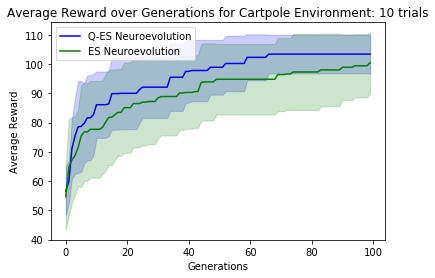

In [235]:
import pandas as pd

import matplotlib.pyplot as plt

data_viz = pd.DataFrame()

data_viz['c_mean'] = np.array(classical_output).mean(axis=0)
data_viz['q_mean'] = np.array(quantum_output).mean(axis=0)

data_viz['c_std'] = np.array(classical_output).std(axis=0)
data_viz['q_std'] = np.array(quantum_output).std(axis=0)

x = np.arange(len(data_viz))
plt.plot(x, data_viz['q_mean'], 'b-', label='Q-ES Neuroevolution')
plt.fill_between(x, data_viz['q_mean'] -data_viz['q_std'], data_viz['q_mean']+ data_viz['q_std'], color='b', alpha=0.2)

plt.plot(x, data_viz['c_mean'], 'g-', label='ES Neuroevolution')
plt.fill_between(x, data_viz['c_mean'] - data_viz['c_std'], data_viz['c_mean'] + data_viz['c_std'], color='g', alpha=0.2)

plt.legend()
plt.title("Average Reward over Generations for Cartpole Environment: 10 trials")
#plt.title("Validation Accuracy curves for HPO Benchmark " +  str(e) + " 20 trials, 100 generations")
plt.xlabel("Generations")
plt.ylabel("Average Reward")
plt.show()

/Users/davidvondollen/opt/anaconda3/envs/phd-fundamentals-3.7/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/davidvondollen/opt/anaconda3/envs/phd-fundamentals-3.7/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


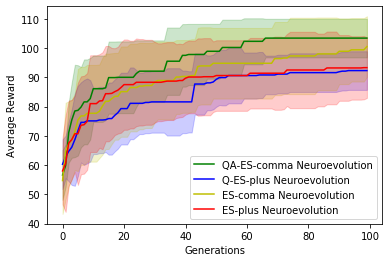

In [150]:
import pandas as pd

import matplotlib.pyplot as plt

data_viz = pd.DataFrame()

data_viz['c_mean'] = np.array(classical_output).mean(axis=0)
data_viz['q_mean'] = np.array(quantum_output).mean(axis=0)
data_viz['c_p_mean'] = np.array(classical_output_p).mean(axis=0)
data_viz['q_p_mean'] = np.array(quantum_output_p).mean(axis=0)

data_viz['c_std'] = np.array(classical_output).std(axis=0)
data_viz['q_std'] = np.array(quantum_output).std(axis=0)
data_viz['c_std_p'] = np.array(classical_output).std(axis=0)
data_viz['q_std_p'] = np.array(quantum_output).std(axis=0)

x = np.arange(len(data_viz))
plt.plot(x, data_viz['q_mean'], 'g-', label='QA-ES-comma Neuroevolution')
plt.fill_between(x, data_viz['q_mean'] -data_viz['q_std'], data_viz['q_mean']+ data_viz['q_std'], color='g', alpha=0.2)

plt.plot(x, data_viz['q_p_mean'], 'b-', label='Q-ES-plus Neuroevolution')
plt.fill_between(x, data_viz['q_p_mean'] -data_viz['q_std_p'], data_viz['q_p_mean']+ data_viz['q_std_p'], color='b', alpha=0.2)

plt.plot(x, data_viz['c_mean'], 'y-', label='ES-comma Neuroevolution')
plt.fill_between(x, data_viz['c_mean'] - data_viz['c_std'], data_viz['c_mean'] + data_viz['c_std'], color='y', alpha=0.2)

plt.plot(x, data_viz['c_p_mean'], 'r-', label='ES-plus Neuroevolution')
plt.fill_between(x, data_viz['c_p_mean'] - data_viz['c_std_p'], data_viz['c_p_mean'] + data_viz['c_std_p'], color='r', alpha=0.2)


plt.legend()
#plt.title("Average Reward over Generations for Cartpole Environment: 10 trials")
#plt.title("Validation Accuracy curves for HPO Benchmark " +  str(e) + " 20 trials, 100 generations")
plt.xlabel("Generations")
plt.ylabel("Average Reward")
plt.show()

In [76]:
data_viz

,c_mean,q_mean,c_p_mean,q_p_mean,c_std,q_std,c_std_p,q_std_p
0,54.7,56.6,58.0,60.3,11.402193,8.475848,11.402193,8.475848
1,64.8,59.8,60.5,62.8,16.515447,7.277362,16.515447,7.277362
2,67.2,71.1,67.5,64.7,14.558846,10.241582,14.558846,10.241582
3,68.7,75.4,68.7,66.1,13.565029,12.916656,13.565029,12.916656
4,71.4,78.5,70.7,68.7,13.101145,15.793986,13.101145,15.793986
...,...,...,...,...,...,...,...,...
95,99.4,103.4,93.2,92.3,10.836974,6.606058,10.836974,6.606058
96,99.4,103.4,93.2,92.3,10.836974,6.606058,10.836974,6.606058
97,99.4,103.4,93.2,92.3,10.836974,6.606058,10.836974,6.606058
98,99.4,103.4,93.3,92.3,10.836974,6.606058,10.836974,6.606058


In [84]:
print(ttest_ind(np.array(quantum_output).mean(axis=0), np.array(classical_output).mean(axis=0)))

Ttest_indResult(statistic=4.280480374756889, pvalue=2.903767571214824e-05)


In [77]:
data_viz['q_mean'].mean()

95.934

In [78]:
data_viz['c_mean'].mean()

90.45499999999998

In [80]:
data_viz['c_p_mean'].mean()

88.035

In [81]:
data_viz['q_p_mean'].mean()

85.02899999999998

In [79]:
ttest_ind(data_viz['q_mean'],data_viz['c_mean'])

Ttest_indResult(statistic=4.280480374756889, pvalue=2.903767571214824e-05)

In [5]:
#try using anm-gym
import gym
import time

def run():
    env = gym.make('gym_anm:ANM6Easy-v0')
    o = env.reset()

    for i in range(100):
        a = env.action_space.sample()
        o, r, done, info = env.step(a)
        env.render()
        time.sleep(0.5)  # otherwise the rendering is too fast for the human eye.

    env.close()
#run()
env = gym.make('gym_anm:ANM6Easy-v0')
o = env.reset()
env.action_space
env.action_space.sample()

/Users/davidvondollen/opt/anaconda3/envs/phd-fundamentals-3.7/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/Users/davidvondollen/opt/anaconda3/envs/phd-fundamentals-3.7/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Users/davidvondollen/opt/anaconda3/envs/phd-fundamentals-3.7/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.war

array([ 16.5670438 ,  44.56251485,  13.62509949, -48.76592643,
        45.47398236,  18.2992318 ])

In [ ]:
# classical
classical_output= []

from numpy.random import randn
population_size = 100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
#mu = int(population_size/2)
mu = 10
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
for test in range(10):
    
    classical_run = []
    population, scores, weights_pop = create_pop_rlnns(population_size)
    best_score =0
    #best_weights = weights_pop[0]
    for i in range(generations):
        
        #select
        print(i)
        scores_sorted = np.argsort(-np.array(scores))
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]
        #print(scores_sorted)
        #print(scores)
        parent_pool = []
        for i in range(mu):
            parent_pool.append(weights_pop[scores_sorted[i]])
        #best_score = np.max(scores)
        #print(best_score)
        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                #parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0.001, high=0.9)
                #child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.02)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=-1, high=1)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            award = 0
            obs = env.reset()
            nn_ = CartPoleNeuralNetwork(obs)
            ind = nn_ .input.shape[1]* nn_ .hidden_size
            nn_ .weights1= i[:ind].reshape(nn_ .input.shape[1], nn_ .hidden_size)
            nn_ .weights2 =i[ind:].reshape(nn_ .hidden_size,2)
            new_population.append(nn_ )
            #new_scores.append()
           
            award = run_env_rl(nn_ , award, env, obs)
            #print(award)
            new_scores.append(award)
            
            
            
            

        best_score_candidate = np.max(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmax(new_scores)]
            #best_weights = new_weights_pop[np.argmax(new_scores)]
        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        classical_run.append(best_score)

        print(best_score)
    classical_output.append(classical_run)
    
    
    
    

In [224]:
# classical
classical_output= []

from numpy.random import randn
population_size = 100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
#mu = int(population_size/2)
mu = 10
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
for test in range(10):
    
    classical_run = []
    population, scores, weights_pop = create_pop_rlnns_mc(population_size)
    best_score =0
    #best_weights = weights_pop[0]
    for i in range(generations):
        
        #select
        print(i)
        scores_sorted = np.argsort(-np.array(scores))
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]
        #print(scores_sorted)
        #print(scores)
        parent_pool = []
        for i in range(mu):
            parent_pool.append(weights_pop[scores_sorted[i]])
        #best_score = np.max(scores)
        #print(best_score)
        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                #parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0.001, high=0.9)
                #child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.02)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=-1, high=1)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            award = 0
            obs = env.reset()
            nn_ = MountainCarNeuralNetwork(obs)
            ind = nn_.input.shape[1]* nn_.hidden_size
            nn_.weights1= i[:ind].reshape(nn_.input.shape[1], nn_.hidden_size)
            nn_.weights2 =i[ind:].reshape(nn_.hidden_size,3)
            new_population.append(nn_)
            #new_scores.append()
           
            award = run_env_rl(nn_ , award, env, obs)
            #print(award)
            new_scores.append(award)
            
            
            
            

        best_score_candidate = np.max(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmax(new_scores)]
            #best_weights = new_weights_pop[np.argmax(new_scores)]
        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        classical_run.append(best_score)

        print(best_score)
    classical_output.append(classical_run)
    
    

0
0
1
0
2
0
3
0
4


KeyboardInterrupt: 

In [218]:
env = gym.make('MountainCar-v0')

In [223]:
from numpy.random import randn
import dimod
import neal
import itertools
quantum_output = []

population_size =100

#print(population)
#print(scores)
#print(len(weights_pop[0]))
#mu = int(population_size/2)
mu = 10
lambda_ = int(population_size/mu)

generations = 100
#print(len(population))
#best_score = np.min(scores)

for test in range(10):
    best_score =0
    quantum_run = []
    population, scores, weights_pop = create_pop_rlnns_mc(population_size)
    
    best_weights = weights_pop[0]
    for i in range(generations):
        print(i)
        #select classically
        #scores_sorted = np.argsort(scores)
        #print(weights_pop[])
        #print(weights_pop[list(scores_sorted[:mu])])
        #parent1 = weights_pop[scores_sorted[0]]
        #parent2 = weights_pop[scores_sorted[1]]

        #parent_pool = []
        #for i in range(mu):
            #parent_pool.append(weights_pop[scores_sorted[i]])
        #select quantumly  
        sampler = neal.SimulatedAnnealingSampler()
        bqm = create_qubo_rl(weights_pop, scores, mu, negate_scores=True)
        parent_pool, scores_pool, = select_individuals(sampler, bqm, weights_pop, scores, mu)

        new_weights_pop = []
        new_population = []
        new_scores = []

        #crossover and mutate
        #for i in range(int(len(population)/2)):
        for parent1 in parent_pool:
            for _ in range(lambda_):
                parent2 = parent_pool[random.randint(0,len(parent_pool)-1)]
                #parent2 = best_weights
                child_1, child_2 = breed_by_crossover(parent1, parent2)
                child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0.001, high=0.9)
                #child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.02)
                #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)

                new_weights_pop.append(child_1)
            #new_weights_pop.append(child_2)
        #print(len(new_weights_pop))
        for i in new_weights_pop:
            award = 0
            obs = env.reset()
            nn_ = MountainCarNeuralNetwork(obs)
            ind = nn_.input.shape[1]* nn_.hidden_size
            nn_.weights1= i[:ind].reshape(nn_.input.shape[1], nn_.hidden_size)
            nn_.weights2 =i[ind:].reshape(nn_.hidden_size,3)
            new_population.append(nn_)
            #new_scores.append()
            #new_scores.append()
           
            award = run_env_rl(nn_ , award, env, obs)
            #print(award)
            new_scores.append(award)

        best_score_candidate = np.max(new_scores)
        if best_score_candidate > best_score:
            best_score = best_score_candidate
            best_nn = new_population[np.argmax(new_scores)]
            best_weights = new_weights_pop[np.argmax(new_scores)]
            
        scores = new_scores
        population = new_population
        weights_pop = new_weights_pop
        print(best_score)
        quantum_run.append(best_score)
    quantum_output.append(quantum_run)
        
    
    

0
9
0
1
9
0
2
9
0
3
9
0
4
9
0
5
9
0
6
9
0
7
9
0
8
9
0
9
9
0
10
9
0
11
10
0
12
10
0
13
10
0
14
10
0
15
10
0
16
10
0
17
10
0
18
10
0
19
10
0
20
10
0
21
10
0
22
10
0
23
10
0
24
10
0
25
10


KeyboardInterrupt: 

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

data_viz = pd.DataFrame()

data_viz['c_mean'] = np.array(classical_output).mean(axis=0)
data_viz['q_mean'] = np.array(quantum_output).mean(axis=0)

data_viz['c_std'] = np.array(classical_output).std(axis=0)
data_viz['q_std'] = np.array(quantum_output).std(axis=0)

x = np.arange(len(data_viz))
plt.plot(x, data_viz['q_mean'], 'b-', label='Q-ES Neuroevolution')
plt.fill_between(x, data_viz['q_mean'] -data_viz['q_std'], data_viz['q_mean']+ data_viz['q_std'], color='b', alpha=0.2)

plt.plot(x, data_viz['c_mean'], 'g-', label='ES Neuroevolution')
plt.fill_between(x, data_viz['c_mean'] - data_viz['c_std'], data_viz['c_mean'] + data_viz['c_std'], color='g', alpha=0.2)

plt.legend()
plt.title("Average Reward over Generations for MountainCar Environment: 10 trials")
#plt.title("Validation Accuracy curves for HPO Benchmark " +  str(e) + " 20 trials, 100 generations")
plt.xlabel("Generations")
plt.ylabel("Average Reward")
plt.show()

In [ ]:
# Try with larger networks

In [ ]:
import gym
import numpy as np
from functools import reduce

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [np.random.uniform(-1, 1, (layers[i], layers[i+1])) for i in range(len(layers) - 1)]

    def forward(self, x):
        for w in self.weights:
            x = np.dot(x, w)
            x = np.tanh(x)
        return x
    
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2

class Neuroevolution:
    def __init__(self, population_size, mutation_rate, layers):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.layers = layers

    def create_population(self):
        return [NeuralNetwork(self.layers) for _ in range(self.population_size)]

    def mutate(self, network):
        for i in range(len(network.weights)):
            if np.random.rand() < self.mutation_rate:
                mutation = np.random.uniform(-1, 1, size=network.weights[i].shape)
                network.weights[i] += mutation

    def crossover(self, parent1, parent2):
        child = NeuralNetwork(self.layers)
        for i in range(len(child.weights)):
            mask = np.random.randint(2, size=child.weights[i].shape)
            child.weights[i] = np.where(mask, parent1.weights[i], parent2.weights[i])
        return child

    def evolve(self, population, fitnesses):
        sorted_pop_fitness = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
        new_population = [neural_network for (neural_network, _) in sorted_pop_fitness[:2]]

        while len(new_population) < self.population_size:
            parent1, parent2 = np.random.choice(population, size=2, p=fitnesses / np.sum(fitnesses))
            child = self.crossover(parent1, parent2)
            self.mutate(child)
            new_population.append(child)

        return new_population

def evaluate(network, env, episodes=5):
    total_reward = 0
    for _ in range(episodes):
        observation = env.reset()
        done = False
        while not done:
            #print(f"Observation: {observation}")  # Add this line
            observation_reshaped = observation[0]
            action = np.argmax(network.forward(observation_reshaped))
            observation, reward, done, _, _ = env.step(action)
            print(observation, reward, done, _, _ )
            total_reward += reward
    return total_reward / episodes

def main():
    env = gym.make("CartPole-v0")
    input_size = env.observation_space.shape[0]
    output_size = env.action_space.n
    print(out)
    layers = [input_size, 16, output_size]

    population_size = 100
    mutation_rate = 0.1
    generations = 50

    neuroevolution = Neuroevolution(population_size, mutation_rate, layers)
    population = neuroevolution.create_population()

    for generation in range(generations):
        fitnesses = [evaluate(network, env) for network in population]
        population = neuroevolution.evolve(population, np.array(fitnesses))

        best_network = population[np.argmax(fitnesses)]
        avg_fitness = np.mean(fitnesses)
        max_fitness = np.max(fitnesses)

        print(f"Generation {generation + 1}, Average fitness: {avg_fitness}, Max fitness: {max_fitness}")



In [ ]:
main()

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model1.summary()

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)



In [ ]:
norm_list = []
for idx, i in enumerate(model1.get_weights()):
    norm_list.append(np.linalg.norm(i - model2.get_weights()[idx]))
    
print(np.array(norm_list).mean())

In [ ]:
model1.compile(loss = 'categorical_crossentropy',     
            optimizer = optimizers.RMSprop(), 
            metrics = ['accuracy'])
print(model1.evaluate(x_train,y_train))

In [ ]:
w= model1.get_weights()
for i in w:
    print(i.shape)
    
for i in w:
    print(i.flatten())

In [ ]:
from keras import losses 
from keras import optimizers 
from keras import metrics 

def create_pop_deep_nns(population_size):
    pop = []
    scores = []
    weights_pop = []
    for i in range(population_size):
        NN = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(),
                layers.Dropout(0.5),
                layers.Dense(num_classes, activation="softmax"),
            ]
        )
        
        NN.compile(loss = 'categorical_crossentropy',     
            optimizer = optimizers.RMSprop(), 
            metrics = ['accuracy'])
        #NN.fit(x_train, y_train)
        pop.append(NN)
        weights_pop.append(NN.get_weights())
        scores.append(NN.evaluate(x_train, y_train, batch_size=8192)[1])
        
    return pop, scores, weights_pop

In [ ]:
dnn_pop, dnn_scores, dnn_weights_pop = create_pop_deep_nns(20)

In [ ]:
def create_qubo_from_dnns(population, scores, k):
    # Get population size
    population_size = len(population)
    pop_index = list(range(population_size))
    #print(pop_index)
    #alpha =100
    
    beta = 10
    alpha = 1000
    #beta = 1
    bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)
    #scores = scores/max(scores)
    for idx, i in enumerate(scores):
        bqm.add_variable(idx, (-i *alpha))
        #print("linear: ", i)
        
    for p0, p1 in itertools.combinations(pop_index, 2):
        norm_list = []
        for idx, i in enumerate(population[p0].get_weights()):
            norm_list.append(np.linalg.norm(i - population[p1].get_weights()[idx]))
        dist = np.array(norm_list).mean()
        #print("quadratic: ", dist)
        bqm.add_interaction(p0, p1, (-dist*beta)) 
   # print(list(bqm.linear.values()))
    #print(list(bqm.linear.values())/min(list(bqm.linear.values())))
    #bqm.linear = list(bqm.linear.values())/max(list(bqm.linear.values()))
    #bqm.quadratic = list(bqm.quadratic.values())/max(list(bqm.quadratic.values()))
    
    bqm.update(dimod.generators.combinations(pop_index, k, strength=1000))
    
    return bqm

def breed_by_crossover_and_mutate_dnn(parent_1, parent_2):
    # Get length of chromosome
    
    parent_1_w = parent_1.get_weights()
    parent_2_w = parent_2.get_weights()
    
    child = []
    
    for idx, i in enumerate(parent_1_w):
        output_shape = i.shape
        
        j = parent_2_w[idx].flatten()
            
        i = i.flatten()
        chromosome_length = len(i)
    
        # Pick crossover point, avoding ends of chromsome
        crossover_point = random.randint(1,chromosome_length-1)

        # Create children. np.hstack joins two arrays
        child_i = np.hstack((i[0:crossover_point],
                            j[crossover_point:]))
        child_i = child_i + np.random.randn(len(child_i)) * np.random.uniform(low=0.001, high=0.01)
        child_i = child_i.reshape(output_shape)
        child.append(child_i)


       
    
    # Return children
    return child

def mutate_dnn(parent_1):
    # Get length of chromosome
    
    parent_1_w = parent_1.get_weights()
    
    
    child = []
    
    for idx, i in enumerate(parent_1_w):
        output_shape = i.shape
        
       
            
        i = i.flatten()
        
        child_i = i + np.random.randn(len(i)) * np.random.uniform(low=0.001, high=0.01)
        child_i = child_i.reshape(output_shape)
        child.append(child_i)


       
    
    # Return children
    return child

In [ ]:
np.random.randn(3) *0.01

In [ ]:
dnn_pop[0].get_weights()

In [ ]:
dnn_pop, dnn_scores, dnn_weights_pop = create_pop_deep_nns(50)
mu = int(5)
population_size = len(dnn_pop)
lambda_ = int(population_size/mu)

generations = 20
print(len(dnn_pop))
best_score = np.max(dnn_scores)

for i in range(generations):
    #select classically
    #scores_sorted = np.argsort(scores)
    #print(weights_pop[])
    #print(weights_pop[list(scores_sorted[:mu])])
    #parent1 = weights_pop[scores_sorted[0]]
    #parent2 = weights_pop[scores_sorted[1]]
    
    #parent_pool = []
    #for i in range(mu):
        #parent_pool.append(weights_pop[scores_sorted[i]])
    #select quantumly  
    sampler = neal.SimulatedAnnealingSampler()
    bqm = create_qubo_from_dnns(dnn_pop, dnn_scores,mu)
    dnn_parent_pool, dnn_scores_pool, = select_individuals(sampler, bqm, dnn_pop, dnn_scores, mu)
    print("selected scores", dnn_scores_pool)
    print('pool', len(dnn_parent_pool))
    print('pop', len(dnn_pop))
    
    new_weights_pop = []
    new_population = []
    new_scores = []
    
    #crossover and mutate
    #for i in range(int(len(population)/2)):
    for parent1 in dnn_parent_pool:
        for _ in range(lambda_):
            parent2 = dnn_parent_pool[random.randint(0,len(dnn_parent_pool)-1)]
            
            #child_1 = breed_by_crossover_and_mutate_dnn(parent1, parent2)
            child_1 = breed_by_crossover_and_mutate_dnn(best_nn, parent2)
            #child_1 = mutate_dnn(parent1)
                
            #child_1 = child_1 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)
            #child_2 = child_2 + np.random.randn(len(parent1)) * np.random.uniform(low=0, high=0.9)

            new_weights_pop.append(child_1)
        #new_weights_pop.append(child_2)
    #print(len(new_weights_pop))
    for weight_i in new_weights_pop:
        NN = keras.Sequential(
            [
                keras.Input(shape=input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(),
                layers.Dropout(0.5),
                layers.Dense(num_classes, activation="softmax"),
            ]
        )
        
        NN.compile(loss = 'categorical_crossentropy',     
            optimizer = optimizers.RMSprop(), 
            metrics = ['accuracy'])
        NN.set_weights(weight_i)
        new_population.append(NN)
        new_scores.append(NN.evaluate(x_train, y_train, batch_size=8192)[1])
        
    best_score_candidate = np.max(new_scores)
    if best_score_candidate > best_score:
        best_score = best_score_candidate
        best_nn = new_population[np.argmax(new_scores)]
        
    dnn_scores = new_scores
    dnn_pop = new_population
    dnn_weights_pop = new_weights_pop
    print(best_score)